# Data Understanding

In [1]:
# Here are all the imports needed for this phase

# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
conversion_df = pd.read_csv("conversion_data.csv")

## Undersampling

As we said in the first part, we need to undersample the data due to a large unbalance according to the target variable __converted__.

In [3]:
nb_not_converted, nb_converted = conversion_df["converted"].value_counts()

conversion_not_converted_df = conversion_df[conversion_df["converted"] == 0]
conversion_converted_df = conversion_df[conversion_df["converted"] == 1]

conversion_not_converted_sample_df = conversion_not_converted_df.sample(nb_converted)
conversion_sample_df = pd.concat([conversion_not_converted_sample_df, conversion_converted_df], axis=0)

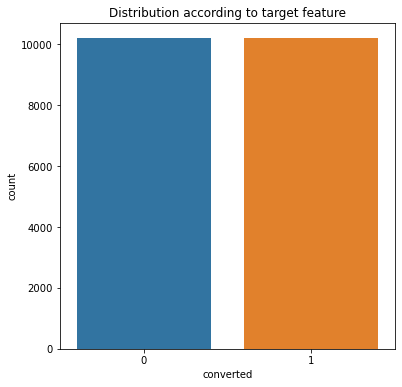

In [4]:
plt.figure(figsize=(6, 6))
sns.countplot(data=conversion_sample_df, x="converted")
plt.title("Distribution according to target feature")
plt.show()

## Descriptive statistics

### Univariate analysis 

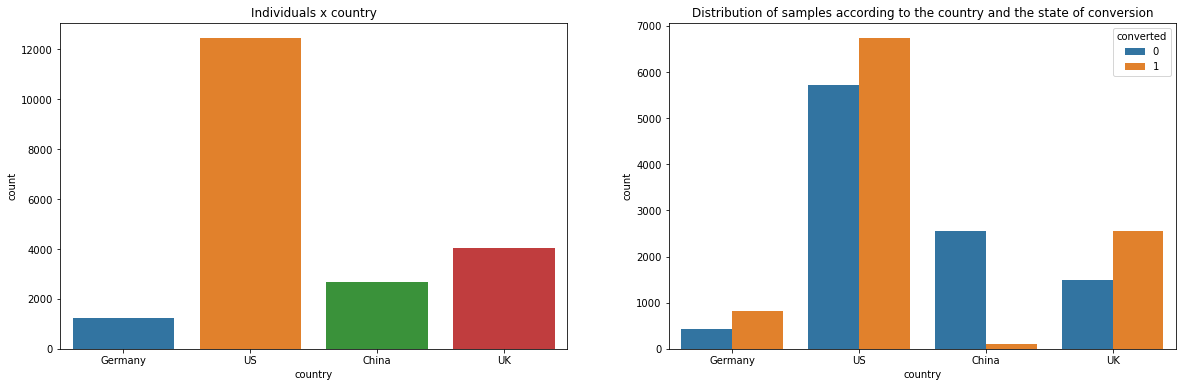

In [5]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data=conversion_sample_df, x="country")
plt.title("Individuals x country")
plt.subplot(122)
sns.countplot(data=conversion_sample_df, x="country", hue="converted")
plt.title("Distribution of samples according to the country and the state of conversion")
plt.show()

* More than half of the users are located in USA
* Except China, the rate of users who converted is beyond the rate of users who didn't.
* Despite of the fact China has more users than Germany, German users convert four times more often than Chinese users.

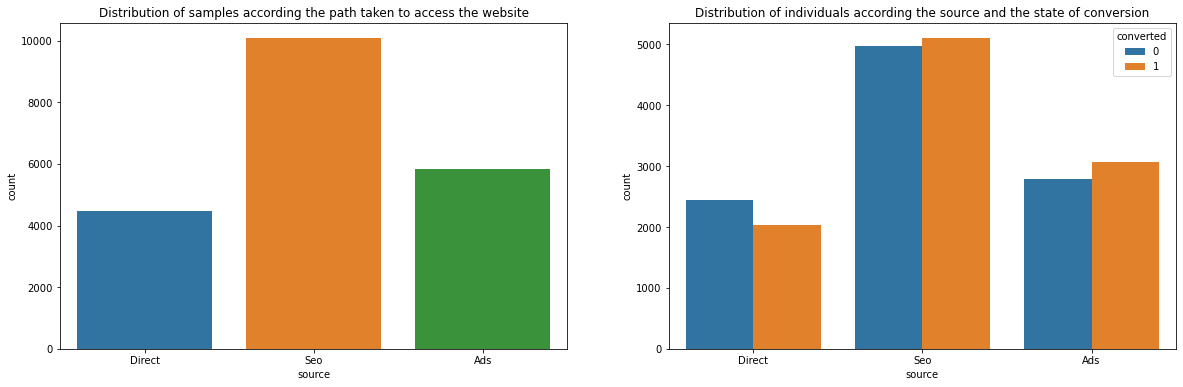

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data=conversion_sample_df, x="source")
plt.title("Distribution of samples according the path taken to access the website")
plt.subplot(122)
sns.countplot(data=conversion_sample_df, x="source", hue="converted")
plt.title("Distribution of individuals according the source and the state of conversion")
plt.show()

* Almost 50% of users arrived on the website thanks to referencing (Seo).
* Analysing each path taken to go on the website points out the rates of users who converted and those who didn't are quite the same (around 50%).

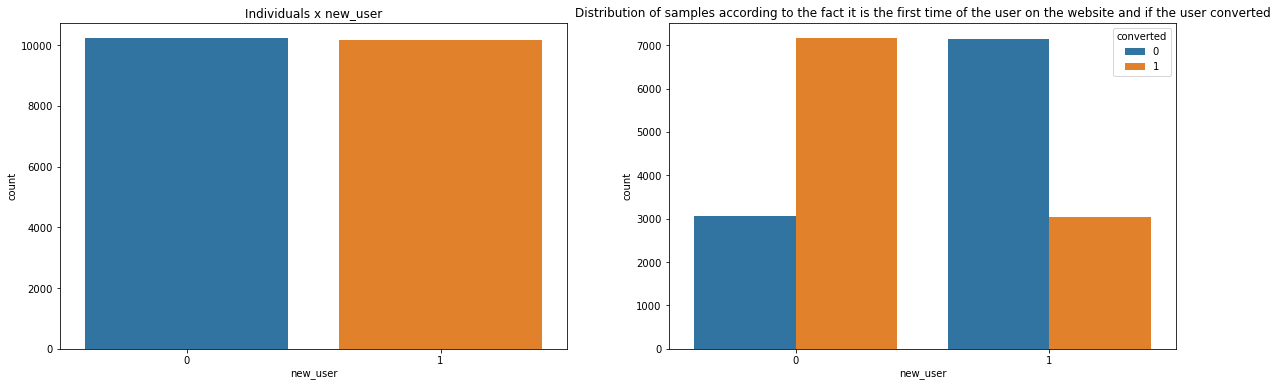

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data=conversion_sample_df, x="new_user")
plt.title("Individuals x new_user")
plt.subplot(122)
sns.countplot(data=conversion_sample_df, x="new_user", hue="converted")
plt.title("Distribution of samples according to the fact it is the first time of the user on the website and if the user converted")
plt.show()

* In this sample of data, we have as many users who ever visited the website as new users. 
* The users who converted are twice more often old users than new users.

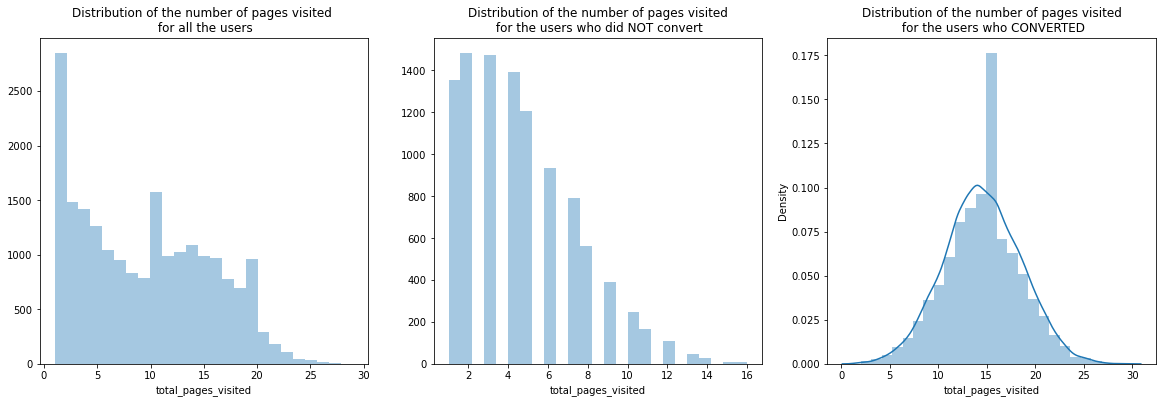

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.distplot(conversion_sample_df["total_pages_visited"], bins=25, kde=False)
plt.title("Distribution of the number of pages visited \n for all the users")
plt.subplot(132)
sns.distplot(conversion_sample_df.loc[conversion_df["converted"] == 0, "total_pages_visited"], bins=25, kde=False)
plt.title("Distribution of the number of pages visited\n for the users who did NOT convert")
plt.subplot(133)
sns.distplot(conversion_sample_df.loc[conversion_df["converted"] == 1, "total_pages_visited"], bins=25, kde=True)
plt.title("Distribution of the number of pages visited\n for the users who CONVERTED")
plt.show()

* As far as the number of pages visited grows, there are less and less samples, which is not remarkable.
* Regarding the people who converted, we observe a distribution pretty symetrical around an average value of 15 pages. For this value, we find few users who didn't convert, most of them visit less than 8 pages before coming out.

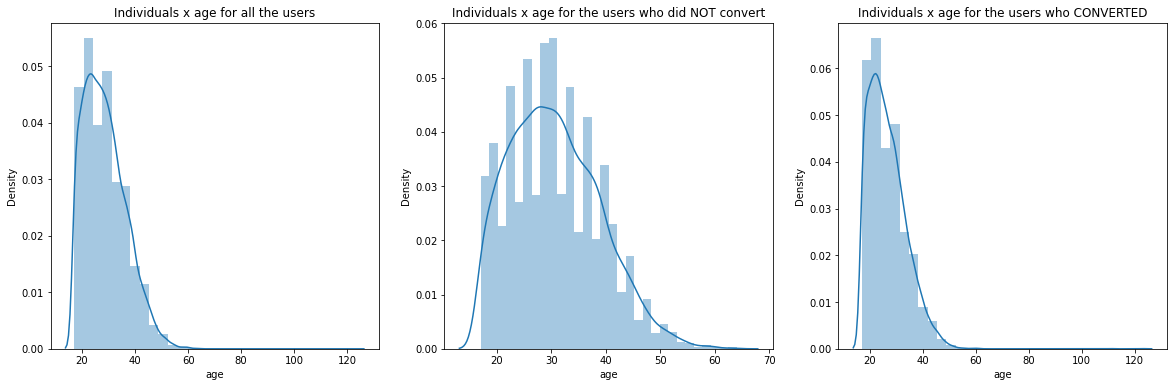

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.distplot(conversion_sample_df["age"], bins=30, kde=True)
plt.title("Individuals x age for all the users")
plt.subplot(132)
sns.distplot(conversion_sample_df.loc[conversion_df["converted"] == 0, "age"], bins=30, kde=True)
plt.title("Individuals x age for the users who did NOT convert")
plt.subplot(133)
sns.distplot(conversion_sample_df.loc[conversion_df["converted"] == 1, "age"], bins=30, kde=True)
plt.title("Individuals x age for the users who CONVERTED")
plt.show()

* Most of users who visited this website are between 20 and 40 years old.
* To be more specific, the users between 20 and 29 years old are these who convert the most.

### Bivariate Analysis

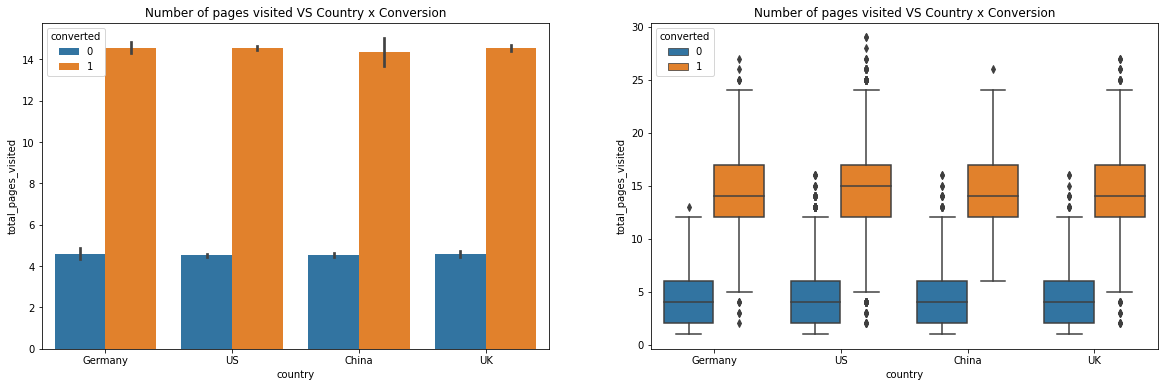

In [10]:
# WE NEED TO CHOOSE ONE OF THEM
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="country", y="total_pages_visited", hue="converted")
plt.title("Number of pages visited VS Country x Conversion")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="country", y="total_pages_visited", hue="converted")
plt.title("Number of pages visited VS Country x Conversion")
plt.show()

* On average, the total number of pages visited by the users who do not convert is 4 while this number is equal to 14 for those who do convert, no matter the country they connected from.
* The country has very few influence on the number of pages visited. The distributions are quite identical for the people who convert, same thing for the people who don't.
* 50% of the no converting users visit from 2 to 6 pages, while 50% of the samples who convert go out from the website after viewing from 12 to 17 pages.

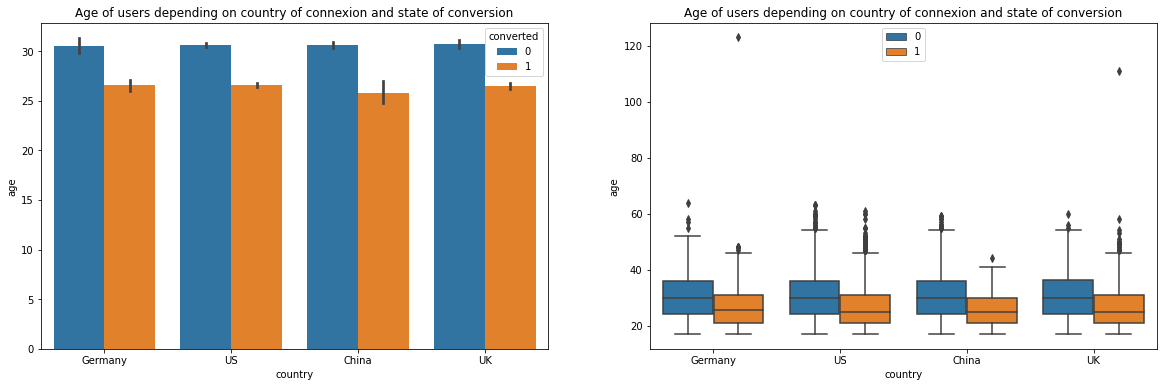

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="country", y="age", hue="converted")
plt.title("Age of users depending on country of connexion and state of conversion")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="country", y="age", hue="converted")
plt.title("Age of users depending on country of connexion and state of conversion")
plt.legend(loc='upper center')
plt.show()

* As well as for the number of pages visited, the users consulting the site spread out over the same range of age, from 17 to 64 ans. However, we notice two individuals in their hundreds, a British person and a German one : it seems to us quite unlike that persons of that age could have consulted the site, and even more unlike they could have proceed to a purchase. So we are deleting these records from our dataset.
* The users who convert are 25 years old on average, and those leaving the website without performing a purchase are 30 years old on average, no matter the country of connexion.
* To the four countries, the distributions of non converting individuals are more spread out than the distributions of the other Internet users. That confirms what we said when reading the histograms. 

In [12]:
conversion_sample_df[conversion_sample_df["age"] >= 100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [13]:
conversion_sample_df = conversion_sample_df[conversion_sample_df["age"] < 100]

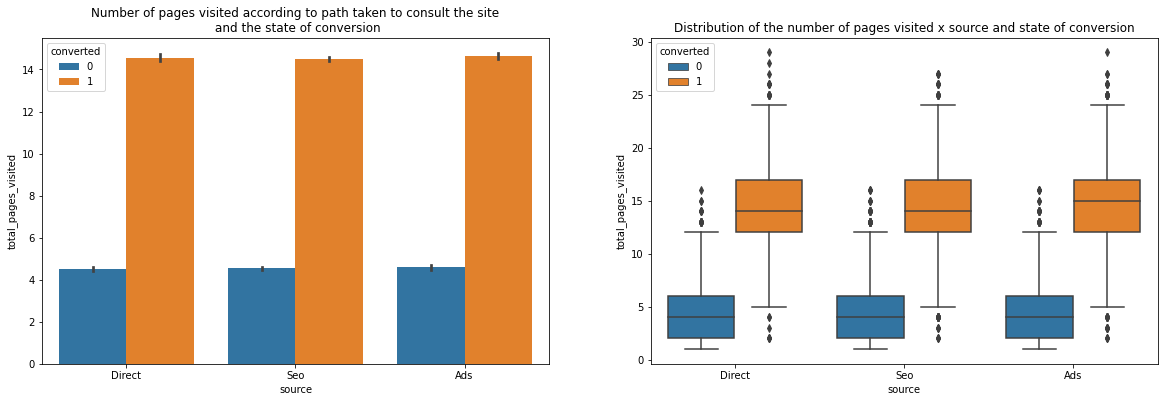

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="source", y="total_pages_visited", hue="converted")
plt.title("Number of pages visited according to path taken to consult the site\n and the state of conversion")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="source", y="total_pages_visited", hue="converted")
plt.title("Distribution of the number of pages visited x source and state of conversion")
plt.show()

* There is no influence of the path followed by the user to access the website over the number of pages visited.
* Whether the user accessed directly the site from his own, or he came after having used a search engine, or he consulted the site after having clicked on an advertisement, we would be incapable of stating the way the user came in just by looking at the number of pages visited.

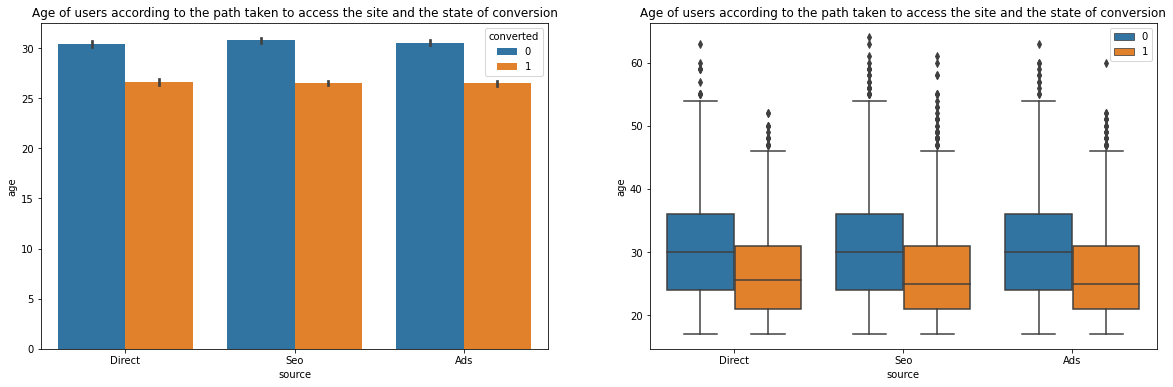

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="source", y="age", hue="converted")
plt.title("Age of users according to the path taken to access the site and the state of conversion")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="source", y="age", hue="converted")
plt.legend(loc='upper right')
plt.title("Age of users according to the path taken to access the site and the state of conversion")
plt.show()

* The means followed by the user to visite the site has no influence over the age. To put it another way, we cannot guess the age of the person consulting the site by only knowing if this person clicked on an ad, typed the URL of the site, or if he used a search engine. 

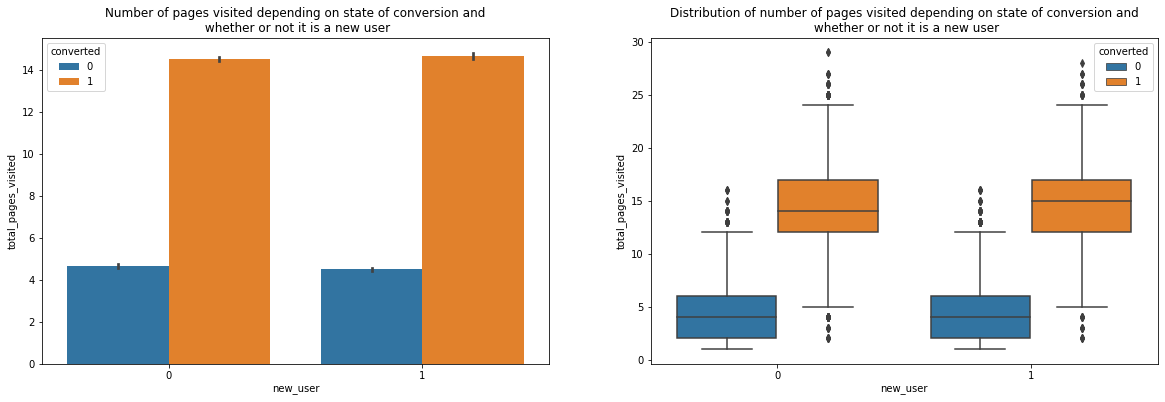

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="new_user", y="total_pages_visited", hue="converted")
plt.title("Number of pages visited depending on state of conversion and\n whether or not it is a new user")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="new_user", y="total_pages_visited", hue="converted")
plt.title("Distribution of number of pages visited depending on state of conversion and\n whether or not it is a new user")
plt.show()

* The average number of pages visited does not change between the old users and the new ones for the two states of conversion.
* The distributions of users who converted and those who did not for the individuals who ever consulted the site are quite similar to the same distributions for the new users.

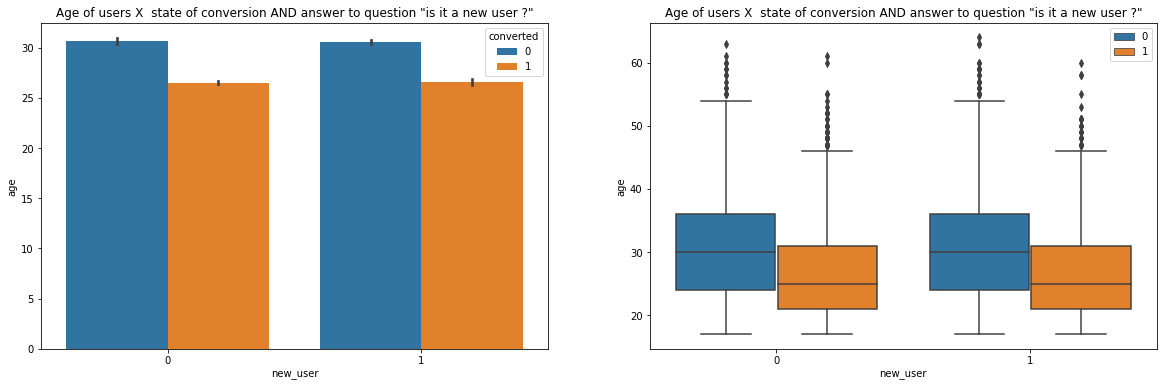

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="new_user", y="age", hue="converted")
plt.title("Age of users X  state of conversion AND answer to question \"is it a new user ?\"")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="new_user", y="age", hue="converted")
plt.legend(loc='upper right')
plt.title("Age of users X  state of conversion AND answer to question \"is it a new user ?\"")
plt.show()

* As for the source, it seems impossible to guess the age of a person consulting the site by only observing if he ever consulted the website in the past.
* Here again, the distribution of age is less spread out for users making a purchase, old or new users. We note that 50% of converting users are located in the range 21-31 years.

## At this stage of analysis

* We figured that the more the number of pages visited grows, the more likely the user is to make a purchase. 
* After a certain age, it is unlikely that the individual will convert.
* If the Internet user has ever consulted the website before, he is more inclined to make a purchase.
* We think the country from which the user logged in and the source that led him to consult the site have no influence on the decision to purchase.

### Next step : Data Preparation

We need to export the data for the further process.

In [18]:
conversion_sample_df.to_csv("conversion_sample_data_understanding.csv", index=False)